## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = mouse_metadata.merge(study_results, how="outer", on="Mouse ID")

# Display the data table for preview. Dataset is a DataFrame with 1893 rows x 8 columns
dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(dataset["Mouse ID"].unique())
print(mice_count)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = dataset.loc[dataset.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"]
print(duplicate_ID.unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = dataset.loc[dataset["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = dataset.drop(labels=range(908, 921), axis=0)

# clean_dataset has 1880 rows x 8 columns. This confirms that 13 rows of Mouse ID "g989" was successfully deleted
clean_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_dataset["Mouse ID"].unique())
print(new_mice_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouped = clean_dataset.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = drug_grouped["Tumor Volume (mm3)"].mean()
median = drug_grouped["Tumor Volume (mm3)"].median()
variance = drug_grouped["Tumor Volume (mm3)"].var()
stdev = drug_grouped["Tumor Volume (mm3)"].std()
sem = drug_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
stat_summary = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":stdev, 
                            "SEM":sem})
stat_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_summary_agg = drug_grouped["Tumor Volume (mm3)"].aggregate(["mean", np.median, "var", "std", "sem"])
stat_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Data Collection per Drug'}, xlabel='Drug Regimen', ylabel='Number of Collected Data'>

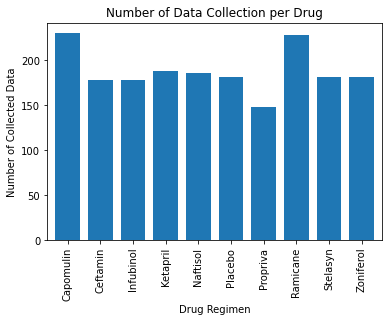

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = drug_grouped["Timepoint"].count()

timepoints.plot(kind="bar", title="Number of Data Collection per Drug", ylabel="Number of Collected Data", width=0.75)

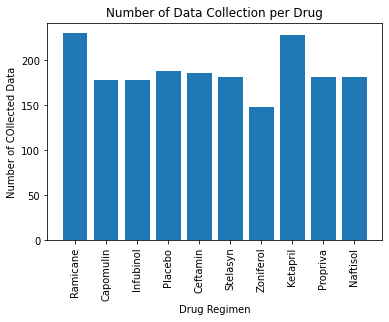

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_dataset["Drug Regimen"].unique()
x_axis
plt.bar(x_axis, timepoints)

# Format graph
plt.title("Number of Data Collection per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of COllected Data")
plt.xticks(rotation=90)

# Show graph
plt.show()

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Mouse ID'>

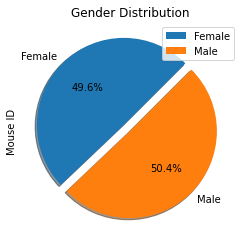

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# First, find sex of unique mouse ID
gender = clean_dataset.loc[:,["Mouse ID", "Sex"]]
gender = gender.drop_duplicates()
gender_count = gender.groupby("Sex").count() # print(gender_count) returns 123 Female and 125 Male

# Graph pie chart
gender_count.plot(kind="pie", y=0, explode=[0.1, 0], autopct="%1.1f%%", shadow=True, title="Gender Distribution", 
                 startangle=45)

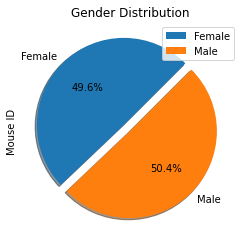

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pie chart processes 1D arrays. Separate the gender_count dataframe in 2 arrays containing sex and count
one_d_gender = [value for value in gender["Sex"]] # an array that lists sex (either male or female) for each mouse ID
sex = ["Female", "Male"]
count = [one_d_gender.count("Female"), one_d_gender.count("Male")] # counts the number of males and females

# Graph pie chart
plt.pie(count, explode=[0.1, 0], shadow=True, labels=gender_count.index, autopct="%1.1f%%", startangle=45) 
plt.title("Gender Distribution")
plt.ylabel("Mouse ID")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
select_drugs = clean_dataset.loc[((clean_dataset["Drug Regimen"] == "Capomulin") | (clean_dataset["Drug Regimen"] ==
                                  "Ramicane")|(clean_dataset["Drug Regimen"] =="Infubinol")|
                                  (clean_dataset["Drug Regimen"] =="Ceftamin"))]
select_drugs = select_drugs.sort_values("Timepoint", ascending=False) #814 rows
drug_tp_grouped = select_drugs.groupby(["Drug Regimen", "Mouse ID"])

final_tp = drug_tp_grouped["Timepoint"].max()
final_tp_df = pd.DataFrame({"Timepoint":final_tp}) # 100 rows

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
select_merged = final_tp_df.merge(select_drugs, how="inner", on=["Mouse ID", "Timepoint"])
select_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to fill with statistical summary data
tumor_vol_lowerq = []
tumor_vol_upperq = []
tumor_vol_iqr = []
tumor_vol_lower_bound = []
tumor_vol_upper_bound = []

# Calculate the IQR and quantitatively determine if there are any potential outliers:

# Locate the rows which contain mice on each drug and get the tumor volumes
select_drug_grouped = select_merged.groupby("Drug Regimen")

quartile = select_drug_grouped["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])

# add subset 
for name in drug:
 #   name = value
    
    lower = quartile[name][0.25]
    tumor_vol_lowerq.append(lower)
    
    upper = quartile[name][0.75]
    tumor_vol_upperq.append(upper)
    
    iqr = upper - lower
    tumor_vol_iqr.append(iqr)
    
    lower_bound = lower - (1.5*iqr)
    tumor_vol_lower_bound.append(lower_bound)
    
    upper_bound = upper + (1.5*iqr)
    tumor_vol_upper_bound.append(upper_bound)

print(f"Each array of outputs are in following order: [Capomulin, Ramicane, Infubinol, Ceftamin]")
print("-------------------------------------")
print(f"lower quantile values are: {tumor_vol_lowerq}")
print(f"upper quantile values are: {tumor_vol_upperq}")
print(f"interquantile values are: {tumor_vol_iqr}")
print(f"tumor volumes that are smaller than the lower bound, {tumor_vol_lower_bound}, can be outliers")
print(f"tumor volumes that are bigger than the upper bound, {tumor_vol_upper_bound}, can be outliers")
print("-------------------------------------")

# Determine outliers using upper and lower bounds
i = 0
outlier = []
while i < len(drug):
    value = select_merged.loc[((select_merged["Tumor Volume (mm3)"] <  tumor_vol_lower_bound[i]) | 
                            (select_merged["Tumor Volume (mm3)"] > tumor_vol_upper_bound[i])) & 
                           (select_merged["Drug Regimen"] == drug[i])]
    outlier.append(value)
    i = i + 1

print(outlier)                            

                            

Each array of outputs are in following order: [Capomulin, Ramicane, Infubinol, Ceftamin]
-------------------------------------
lower quantile values are: [32.37735684, 31.56046955, 54.04860769, 48.72207785]
upper quantile values are: [40.1592203, 40.65900627, 65.52574285, 64.29983003]
interquantile values are: [7.781863460000004, 9.098536719999998, 11.477135160000003, 15.577752179999997]
tumor volumes that are smaller than the lower bound, [20.70456164999999, 17.912664470000003, 36.83290494999999, 25.355449580000002], can be outliers
tumor volumes that are bigger than the upper bound, [51.83201549, 54.30681135, 82.74144559000001, 87.66645829999999], can be outliers
-------------------------------------
[Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: [], Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: [],    Mouse 

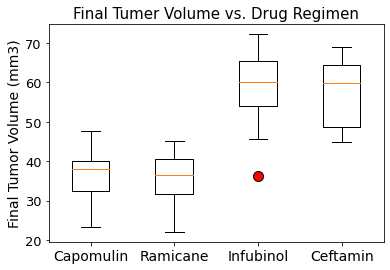

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# For loop to add tumor volume data into a list
for x in drug:
    
    if x == "Capomulin":
        tv1 = select_merged[select_merged["Drug Regimen"] == x]["Tumor Volume (mm3)"]
        
    elif x == "Ramicane":
        tv2 = select_merged[select_merged["Drug Regimen"] == x]["Tumor Volume (mm3)"]
        
    elif x == "Infubinol":
        tv3 = select_merged[select_merged["Drug Regimen"] == x]["Tumor Volume (mm3)"]
        
    else:
        tv4 = select_merged[select_merged["Drug Regimen"] == x]["Tumor Volume (mm3)"]
        
tumor_volume_data = [tv1, tv2, tv3, tv4]

# Graph box plot
flierprops = dict(marker="o", markerfacecolor="red", markersize=10)
plt.boxplot(tumor_volume_data, flierprops=flierprops)

# Format the plot
x_axis_box = np.arange(len(drug))
tick_location = [value+1 for value in x_axis_box]
plt.title("Final Tumer Volume vs. Drug Regimen", fontsize=15)
plt.ylabel("Final Tumor Volume (mm3)", fontsize=14)
plt.xticks(tick_location, drug, fontsize=14)
plt.yticks(fontsize=13)
flierprops 

plt.show()

## Line and Scatter Plots

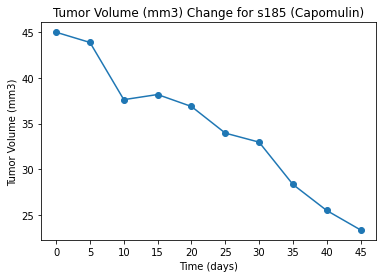

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# First, extract data of a mouse with Capomulin. I chose "s185"
capomulin_treatment = clean_dataset.loc[clean_dataset["Mouse ID"] == "s185"] # 10 rows x 8 columns

# line graph
x_axis_s185 = np.arange(0, 46, 5)
s185_data = capomulin_treatment["Tumor Volume (mm3)"].tolist()
plt.plot(x_axis_s185, s185_data, marker="o")

# Format the graph
plt.title("Tumor Volume (mm3) Change for s185 (Capomulin)")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([value for value in x_axis_s185])

plt.show()

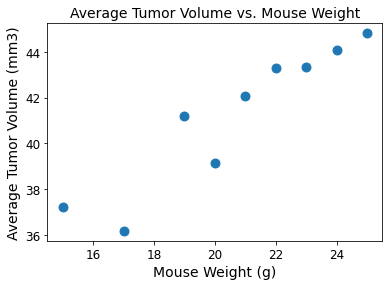

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Extract Capomulin-treated samples from clean_dataset to get x-axis and y-axis
capomulin_treatment = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Capomulin", 
                                        ["Weight (g)", "Tumor Volume (mm3)"]]
x_axis_cap = capomulin_treatment["Weight (g)"].unique() # Returns [15, 17, 19, 20, 21, 22, 23, 24, 25]

ave_volume = capomulin_treatment.groupby("Weight (g)").mean() 

# Graph the scatter plot
plt.scatter(x_axis_cap, ave_volume, marker="o", s=80)
plt.title("Average Tumor Volume vs. Mouse Weight", fontsize=14)
plt.xlabel("Mouse Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Correlation and Regression

The correlation coefficient is 0.93.
slope: 0.8794181336046227
y-intercept: 23.08155582360033
R-value: 0.9342132083005746
P-value: 0.00022537876816495573
stderr: 0.12691761992123854


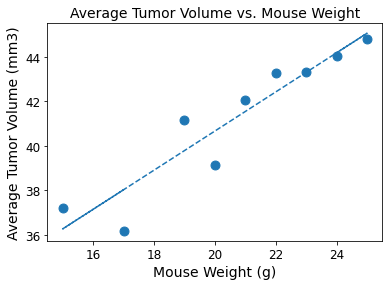

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ave_volume_list = ave_volume["Tumor Volume (mm3)"]
coeff = round(st.pearsonr(x_axis_cap, ave_volume_list)[0],2) #0.93
print(f"The correlation coefficient is {coeff}.")

# Regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_axis_cap, ave_volume_list)

print(f"slope: {slope}")
print(f"y-intercept: {intercept}")
print(f"R-value: {rvalue}")
print(f"P-value: {pvalue}")
print(f"stderr: {stderr}")

fit = slope * x_axis_cap + intercept

# Plot
plt.scatter(x_axis_cap, ave_volume, marker="o", s=80)
plt.title("Average Tumor Volume vs. Mouse Weight", fontsize=14)
plt.xlabel("Mouse Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.plot(x_axis_cap, fit, linestyle="--")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()